# Prosper Loan Data Exploration
## by Satoshi

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')

In [3]:
# overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# select columns that may impact on this analysis 
loan=df[['ListingNumber','CreditGrade','LoanStatus','BorrowerAPR','BorrowerRate',
        'LenderYield','EstimatedLoss','EstimatedReturn','ProsperRating (Alpha)',
         'ProsperScore','ListingCategory (numeric)','CurrentlyInGroup','Occupation',
         'EmploymentStatus','EmploymentStatusDuration',
       'IsBorrowerHomeowner','IncomeRange', 'LoanOriginalAmount']]

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   CreditGrade                28953 non-null   object 
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   LenderYield                113937 non-null  float64
 6   EstimatedLoss              84853 non-null   float64
 7   EstimatedReturn            84853 non-null   float64
 8   ProsperRating (Alpha)      84853 non-null   object 
 9   ProsperScore               84853 non-null   float64
 10  ListingCategory (numeric)  113937 non-null  int64  
 11  CurrentlyInGroup           113937 non-null  bool   
 12  Occupation                 110349 non-null  object 
 13  EmploymentStatus           11

### What is the structure of your dataset?

> From the original dataset, I select 18 variables on each loan that may impact on the analysis mentioned below. Those variables include loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Most variables are numeric in nature, but those valuables such as credit grade, income range, loan status, prosper rating, employment status are categorical.

### What is/are the main feature(s) of interest in your dataset?

> - What factors affect a loan’s outcome status?
> - What affects the borrower’s APR or interest rate?
> - Are there differences between loans depending on how large the original loan amount was?
> >- What's the average borrower APR on big and on a small loans ?
> >- Who takes big loans? Who takes small loans?
> >- Are there any differences in the loan status? Are small loans past due or defaulted more or less often?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that following valuables are strong effect on loan status, borrowerAPR, lender yield/loss and loan original amount; 

>> credit grade, occupation, employment status, employment status duration, borrowers home ownership and income range

## Univariate Exploration

> I'll start by looking at the distribution of valuables mentioned above. And, dataframe should be cleaned upon necessary.

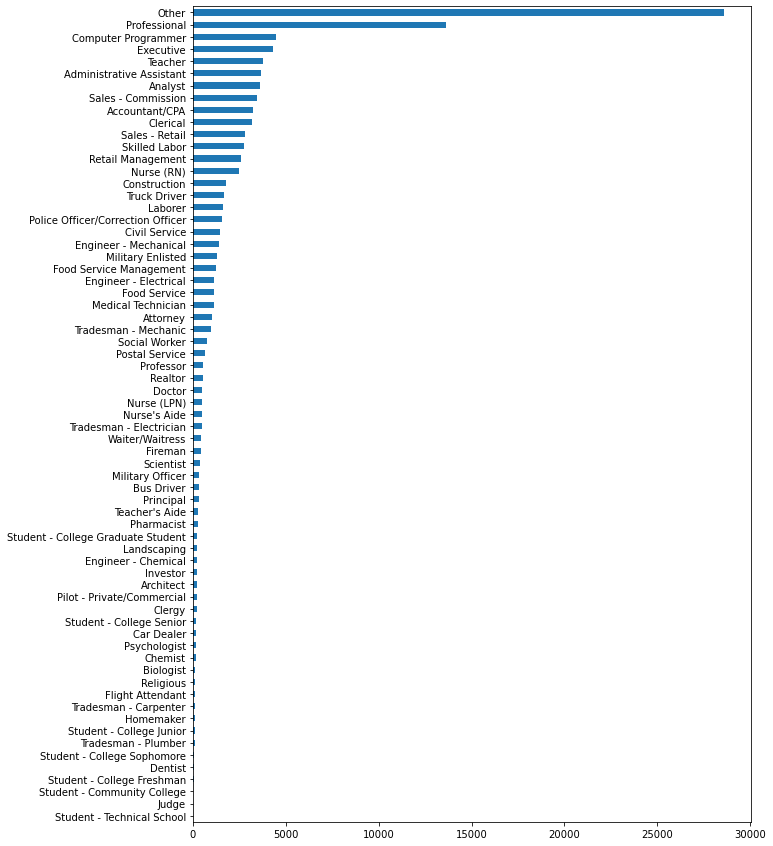

In [6]:
# look at Occupation distribution by bar plot
loan.Occupation.value_counts(ascending=True).plot(kind='barh', figsize=(10,15));

> Huge varieties of the occupations are there and around 1/3 are categorized as 'Other'.  Therefore, it needs to be looked at in more detail later. There are students listed that make me feel a bit strange, need to look at later as well. 

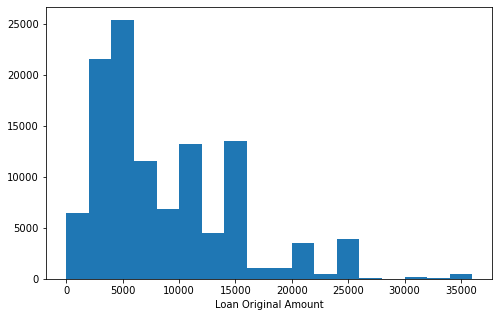

In [7]:
# plot hist for distribution of loan original amount

binsize=2000
bins=np.arange(0, loan['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8,5])  
plt.hist(data=loan, x='LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Original Amount');

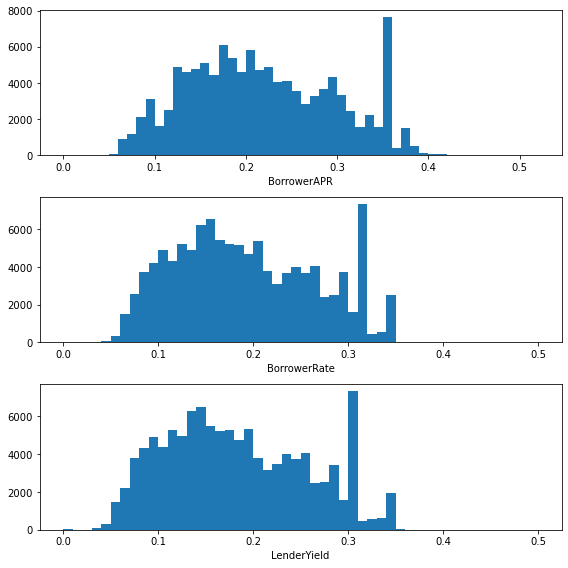

In [8]:
# to check the shape of the distribution of 3 columns related to interest
fig, ax=plt.subplots(nrows=3, figsize=[8,8])

variables=['BorrowerAPR','BorrowerRate','LenderYield']

for i in range(len(variables)):
    var=variables[i]
    binsize=0.01
    bins=np.arange(0, loan[var].max()+binsize,binsize)
    ax[i].hist(data=loan, x=var, bins=bins)
    ax[i].set_xlabel('{}'.format(var))

plt.tight_layout()
plt.show();

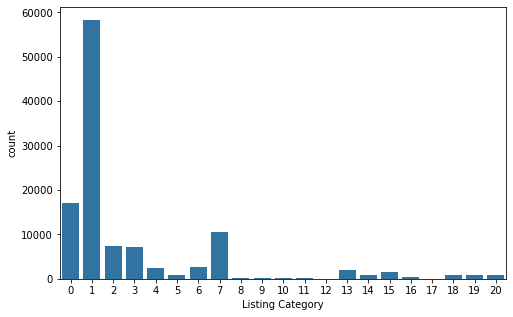

In [9]:
# check the distribution of ListingCategoly
plt.figure(figsize=[8,5])
default_color=sb.color_palette()[0]   
sb.countplot(data=loan, x='ListingCategory (numeric)', color=default_color)
plt.xlabel('Listing Category');

> Around a half of the data('1': debt consolidation), 2nd largest('0':Not available) and third one('7': others) that make me feel that data of this column may be less useful for this analysis, but keep them to come back later. 

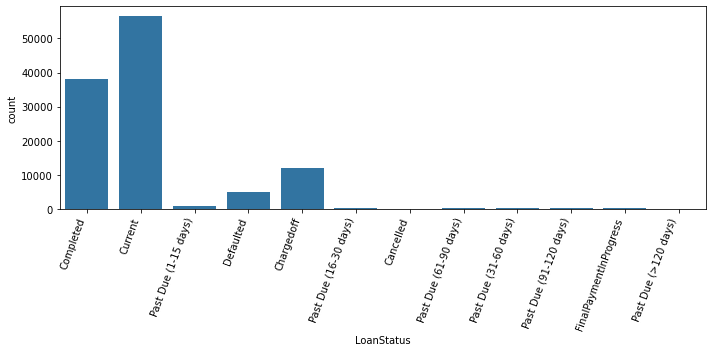

In [10]:
# check loan status by countplot
plt.figure(figsize=(10,5))

g=sb.countplot(x='LoanStatus', data=loan, color=default_color)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=70, 
                  horizontalalignment='right',
                 fontweight='light')

plt.tight_layout();

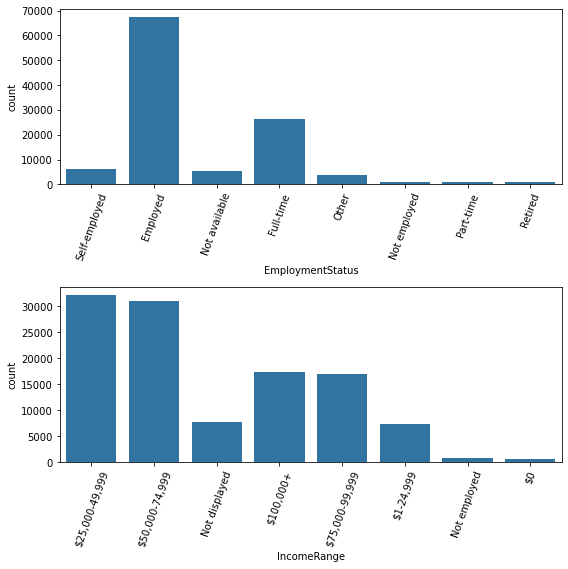

In [11]:
# check employment status and income range by countplot
fig,ax=plt.subplots(nrows=2, figsize=[8,8])
plt.tight_layout()
default_color=sb.color_palette()[0]

a=sb.countplot(data=loan, x='EmploymentStatus', color=default_color, ax=ax[0])
b=sb.countplot(data=loan, x='IncomeRange', color=default_color, ax=ax[1])
a.set_xticklabels(a.get_xticklabels(), rotation=70)
b.set_xticklabels(b.get_xticklabels(), rotation=70)

plt.tight_layout()
plt.show()

C:\Users\wythe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


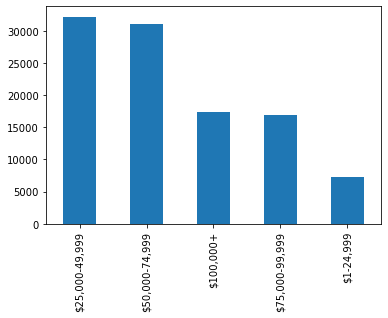

In [12]:
# clean df loan'IncomeRange'
# replace 'Not displayed' and '0' as NaN in 'IncomeRange' column
loan['IncomeRange']=loan.IncomeRange.replace(['Not displayed','$0','Not employed'],
                                                       [np.nan,np.nan,np.nan])
loan.IncomeRange.value_counts().plot(kind='bar');

C:\Users\wythe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


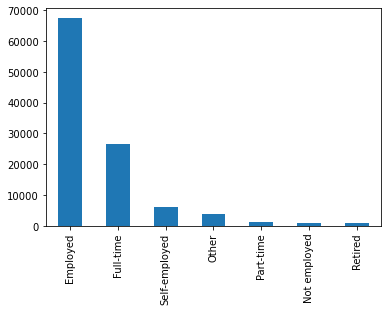

In [13]:
# clean df loan'EmploymentStatus'
loan['EmploymentStatus']=loan.EmploymentStatus.replace('Not available',np.nan)
loan.EmploymentStatus.value_counts().plot(kind='bar');

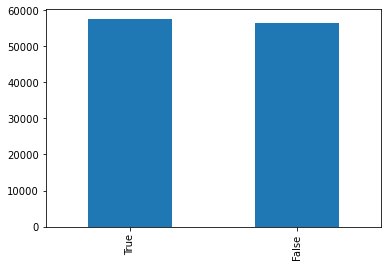

In [14]:
# check the ratio between with home and without home ownership
loan.IsBorrowerHomeowner.value_counts().plot(kind='bar');

In [15]:
# create new column,'Grade' by combining 'CreditGrade' column with 'ProsperRating'colum
# CreditGrade is rating pre2009 and ProsperRating is rating after July 2009 
loan['Grade']=loan.CreditGrade.str.cat(loan['ProsperRating (Alpha)'], join='left', na_rep="")

C:\Users\wythe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


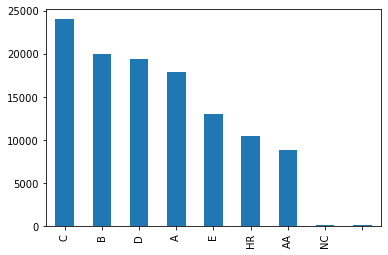

In [16]:
# check newly created 'Grade' column
loan.Grade.value_counts().plot(kind='bar');

C:\Users\wythe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


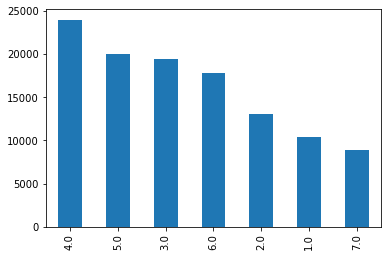

In [17]:
# create new colum, 'GradeNumeric' that is a numeric version of 'Grade'
loan['GradeNumeric']=loan.Grade.replace(['NC','N/A',"",'HR','E','D','C','B','A','AA'],
                                                       [np.nan,0,np.nan,1,2,3,4,5,6,7])
loan.GradeNumeric.value_counts().plot(kind='bar');

In [18]:
# Data of 'EmploymentStatusDuration' break into 4 groups, short, medium, long and very_long
# first, check quartile points
loan.EmploymentStatusDuration.describe()

count    106312.000000
mean         96.071582
std          94.480605
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

C:\Users\wythe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


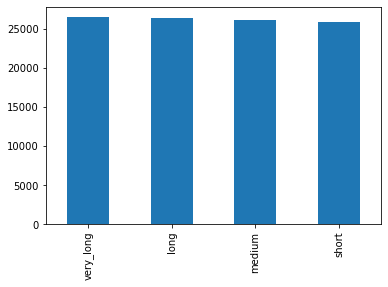

In [19]:
# pd.cut based on quartile points 
bin_edges=[0,26,67,137,755]
bin_names=['short','medium','long','very_long']
loan['EmploymentDuration']=pd.cut(loan.EmploymentStatusDuration, bin_edges, labels=bin_names)
loan.EmploymentDuration.value_counts().plot(kind='bar');

In [20]:
# check loanSstatus column
loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [21]:
# put several Past Due data all together into one sigle Past Due in the new column 'LoanStatus1'
loan['LoanStatus1']=loan['LoanStatus'].replace(['Past Due (1-15 days)','Past Due (31-60 days)',
                                                'Past Due (61-90 days)','Past Due (91-120 days)',
                                                'Past Due (16-30 days)','Past Due (>120 days)',
                                                'FinalPaymentInProgress','Cancelled'],
                                                       ['Past Due','Past Due','Past Due','Past Due',
                                                        'Past Due','Past Due',np.nan,np.nan])

C:\Users\wythe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


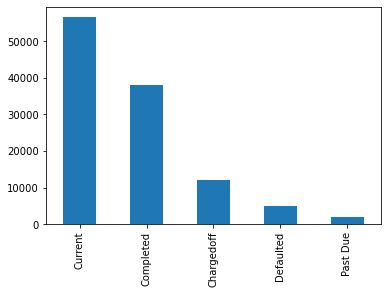

In [22]:
loan.LoanStatus1.value_counts().plot(kind='bar');

In [23]:
# convert IncomeRange, Grade and LoanStatus1 into ordered categolical types
ordinal_var_dict={'IncomeRange':['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                 'Grade':['HR','E','D','C','B','A','AA'],
                 'LoanStatus1':['Chargedoff','Defaulted','Past Due','Current','Completed']
                  }
for var in ordinal_var_dict:
    ordered_var=pd.api.types.CategoricalDtype(ordered=True,
                                             categories=ordinal_var_dict[var])
    loan[var]=loan[var].astype(ordered_var)

C:\Users\wythe\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [24]:
loan.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

C:\Users\wythe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


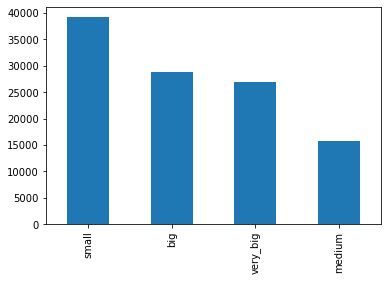

In [25]:
# 'LoanOriginalAmount' breaks into 4 groups based on level of amounts, small, medium, big and very_big
# crate new column 'LoanOriginalAmount_q'

bin_edges=[1000,4000,6500,12000,35000]
bin_names=['small','medium','big','very_big']
loan['LoanOriginalAmount_q']=pd.cut(loan.LoanOriginalAmount, bin_edges, labels=bin_names)
loan.LoanOriginalAmount_q.value_counts().plot(kind='bar');

In [26]:
# create new colum 'student'
# select occupations with the word 'student' name them as 'student', otherwise 'not student' 
loan['student']=np.where(loan.Occupation.str.contains('Student'), 'student','not student')

C:\Users\wythe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# save as 'loan.csv'
loan.to_csv('loan.csv', index=True)

In [28]:
# overview of wrrangled 'loan'
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ListingNumber              113937 non-null  int64   
 1   CreditGrade                28953 non-null   object  
 2   LoanStatus                 113937 non-null  object  
 3   BorrowerAPR                113912 non-null  float64 
 4   BorrowerRate               113937 non-null  float64 
 5   LenderYield                113937 non-null  float64 
 6   EstimatedLoss              84853 non-null   float64 
 7   EstimatedReturn            84853 non-null   float64 
 8   ProsperRating (Alpha)      84853 non-null   object  
 9   ProsperScore               84853 non-null   float64 
 10  ListingCategory (numeric)  113937 non-null  int64   
 11  CurrentlyInGroup           113937 non-null  bool    
 12  Occupation                 110349 non-null  object  
 13  EmploymentStat

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> BorrowerAPR, BorrowerRate and LenderYeild have 3 peaks. I assume that those three peaks correspond to the distribution of the size of Original Loan Amount that has also 3 peaks in small, medium and big loan amounts respectively.

> I can not find any unusual points here. I need to look further in the bivariate and multivariate exploration.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I selected 18 columns in the dataframe 'loan'.

> I made following wrangling operation on loan and created additional 5 more columns;

> - 'IncomeRange' column, 'Not displayed' and '$0' replaced to NaN
> - 'EmploymentStatus' column, 'Not available' replaced to NaN
> - create new column, 'Grade' by combining 'CreditGrade' and 'ProsperRating'
> - create new column, 'GradeNumeric', numeric data of 'Grade'
> - 'EmploymentDuration' cut into 4 group, 'short', 'medium', 'long' and 'very_long'
> - create new column,'LoanStatus1' by putting several Past Dues all together into one single Past Due
> - convert IncomeRange, Grade and LoanStatus1 into ordered categorical types
> - LoanOriginalAmount cut into 4 groups based on those amounts,'small','medium','big' and 'very_big'
> - create a new column 'student' where only 'student' or 'not student' are around.


## Bivariate Exploration

> To start with, depend on the size of loan amounts(small loan and very big loan) , look at the differences of occupation, loan categories and students(specifically picked up from the Occupation column) .
> Then, go to the pairwise correlation plots to see the correlations among numeric variables such as BorrowerAPR, Estimated Loss, Estimated Return, Loan Original Amount and GradeNumeric.
> Then,  scatter PairGrid to look more in detail of the relationship among numeric variables.

#### Who take big loan and small loan

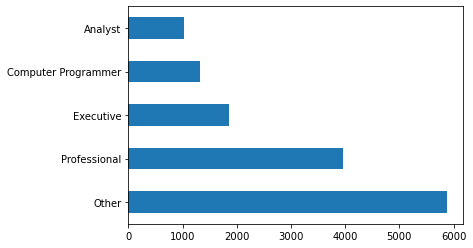

In [29]:
# top 5 list of occupation of very big loan
original_amount=loan.query('LoanOriginalAmount_q=="very_big"')['Occupation'].value_counts()[:5].plot(kind='barh')

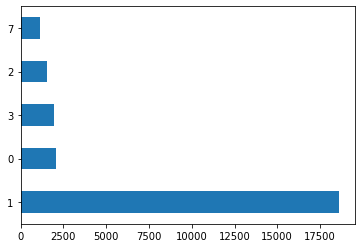

In [30]:
# top 5 list of category of very big loan
original_amount=loan.query('LoanOriginalAmount_q=="very_big"')['ListingCategory (numeric)'].value_counts()[:5].plot(kind='barh')

1:Debt Consolidation, 0:Not Available, 3:Business, 2:Home Improvement 7:Other

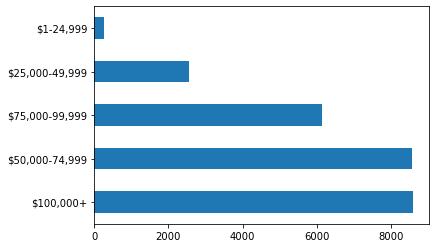

In [31]:
# Income rage of very big loan
original_amount=loan.query('LoanOriginalAmount_q=="very_big"')['IncomeRange'].value_counts().plot(kind='barh')

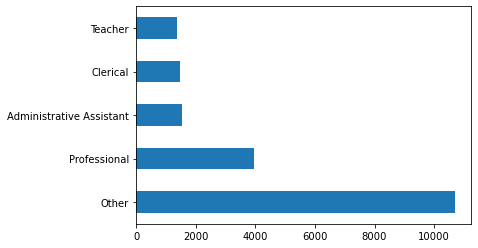

In [32]:
# top 5 occupation of small loan
original_amount=loan.query('LoanOriginalAmount_q=="small"')['Occupation'].value_counts()[:5].plot(kind='barh')

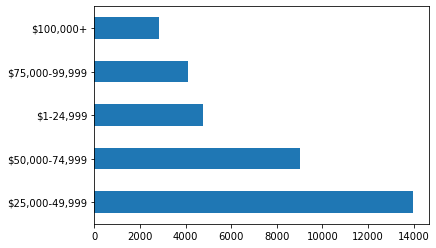

In [33]:
# income range of small loan
original_amount=loan.query('LoanOriginalAmount_q=="small"')['IncomeRange'].value_counts()[:5].plot(kind='barh')

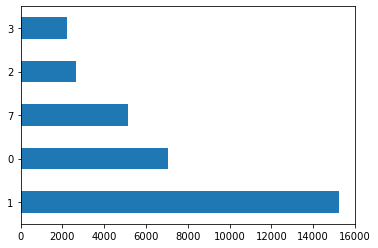

In [34]:
#top 5 of category of small loan
original_amount=loan.query('LoanOriginalAmount_q=="small"')['ListingCategory (numeric)'].value_counts()[:5].plot(kind='barh')

1: Debt Consolidation, 0: Not Available, 7:Other, 2: Home Improvement, 3: Business

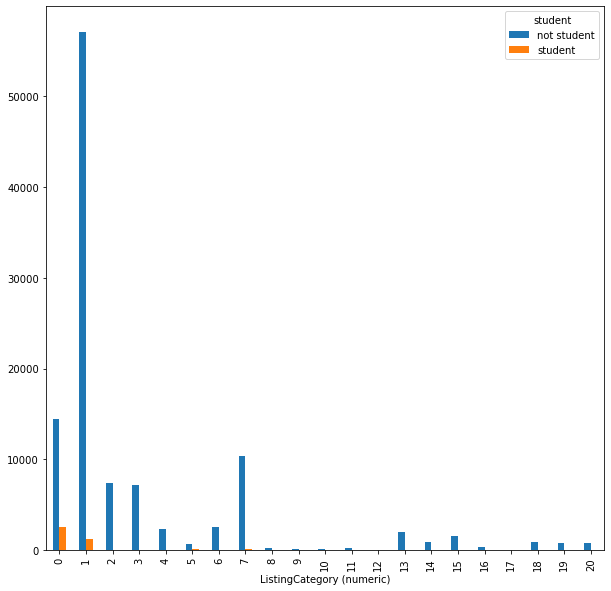

In [35]:
# category for studenet
student_category=loan.groupby(['ListingCategory (numeric)','student'])
student_category.size().unstack().plot(kind='bar', figsize=[10,10]);

0: Not Available, 1:Debt Consolidation, 7: Other, 5: Student Use

> Occupation of very big loans are Professional, Executive, Computer Programmer, Analyst etc those are, generally speaking, high earners that were evidenced by the plots of IncomeRange, nearly 70% of very big loan is taken by the people of income above US$50,000.

> In terms of small loans, findings are the other way around, more than half of small loans are taken by the income range less than $50,000 whose occupation are professional, Administrative Assistant, Clerical, Teacher that are different from big loan takers. This is waht I expected.

> The plot for Category of loans, It is hard to find something because information is limited due to the nature of categorization, i.e.  'Not available', 'others' and 'debt consolidation’ are listed as top3.

> The plot for students, I also can not find any particular issue or hint here.


#### Pairwise correlation

> Here, I will look at correlation among numeric valuables such as Borrower APR, Loan Original Amount, Employment Status, Income Range, Employment Duration and Grade.

In [36]:
numeric_vars=['BorrowerAPR','EstimatedLoss','EstimatedReturn','LoanOriginalAmount',
             'GradeNumeric']
categoric_vars=['LoanOriginalAmount_q','EmploymentStatus','IncomeRange','EmploymentDuration']

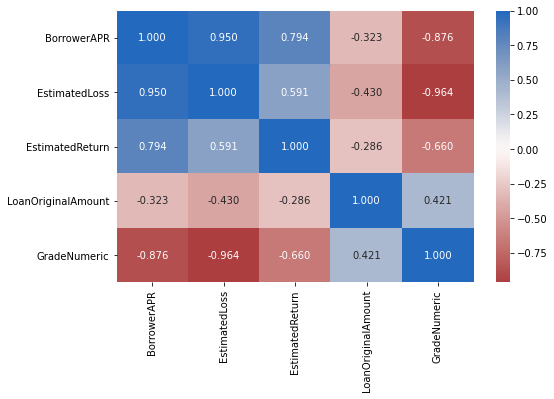

In [37]:
# correlation plot
plt.figure(figsize=[8,5])
sb.heatmap(loan[numeric_vars].corr(), annot=True, fmt='.3f',cmap='vlag_r', center=0)
plt.show();

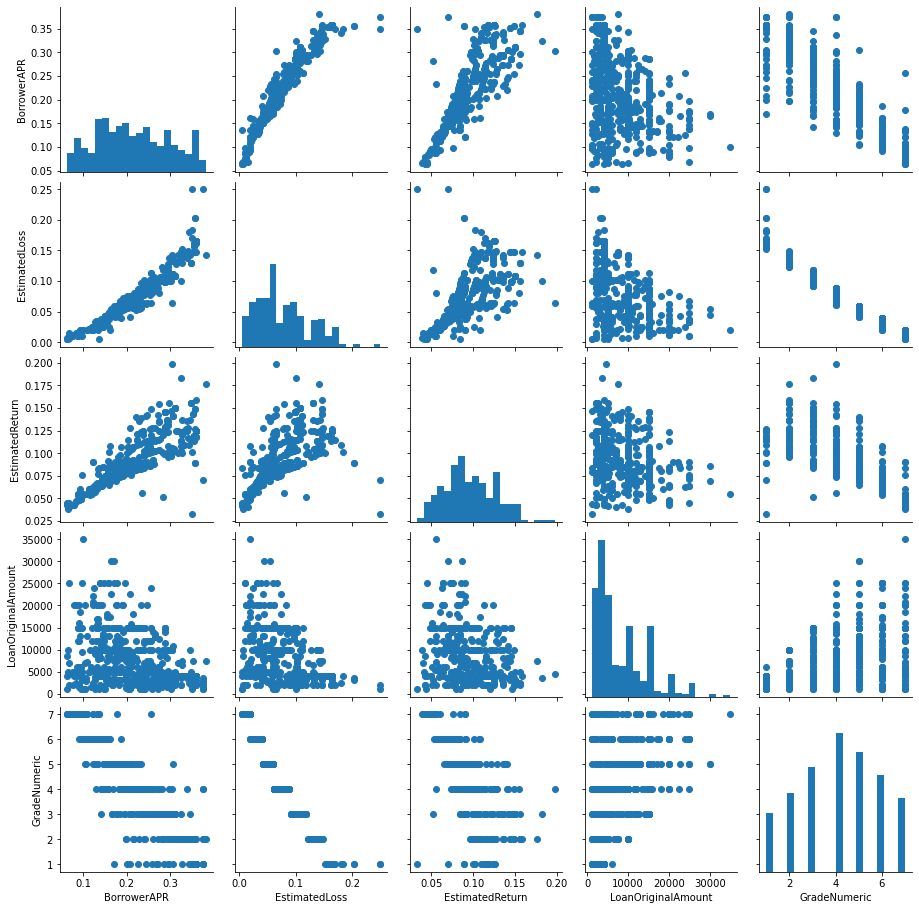

In [38]:
#plot matrix: sample 500 loan so that plots are clearer and they render faster
samples=np.random.choice(loan.shape[0],500,replace=False)
loan_samp=loan.loc[samples,:]

g=sb.PairGrid(data=loan_samp,vars=numeric_vars)
g=g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter);

> As expected Borrower APR and Grade Numeric are negatively correlated. The better grade borrowers can have a chance to get a low interest rate. And also Borrower APR is negatively correlated with loan original amount. Interest rates of small loans are higher than ones in big loans.

> Loan Original lAmount is positively correlated with Grade Numeric. This is also consistent  with my expectation. The better grade can get bigger amount of loans

> Borrowers APR and Estimated Loss are positively correlated and also positively correlated with Estimated Return as well. This outcome is a bit confusing. But it can be understandable that Estimated Return are positive correlations with Borrower APR because high interest rates can give a more profit to lenders than low interest loans but,  at the same time,  that high interest rate is given to low grade borrowers that should increase the chances of defaults. So, this result suggests that high interest rate loan is a high risk and high return loans.

In [39]:
samples=np.random.choice(loan.shape[0], 2000, replace=False)

In [40]:
loan_samp=loan.iloc[samples,:]

<Figure size 720x720 with 0 Axes>

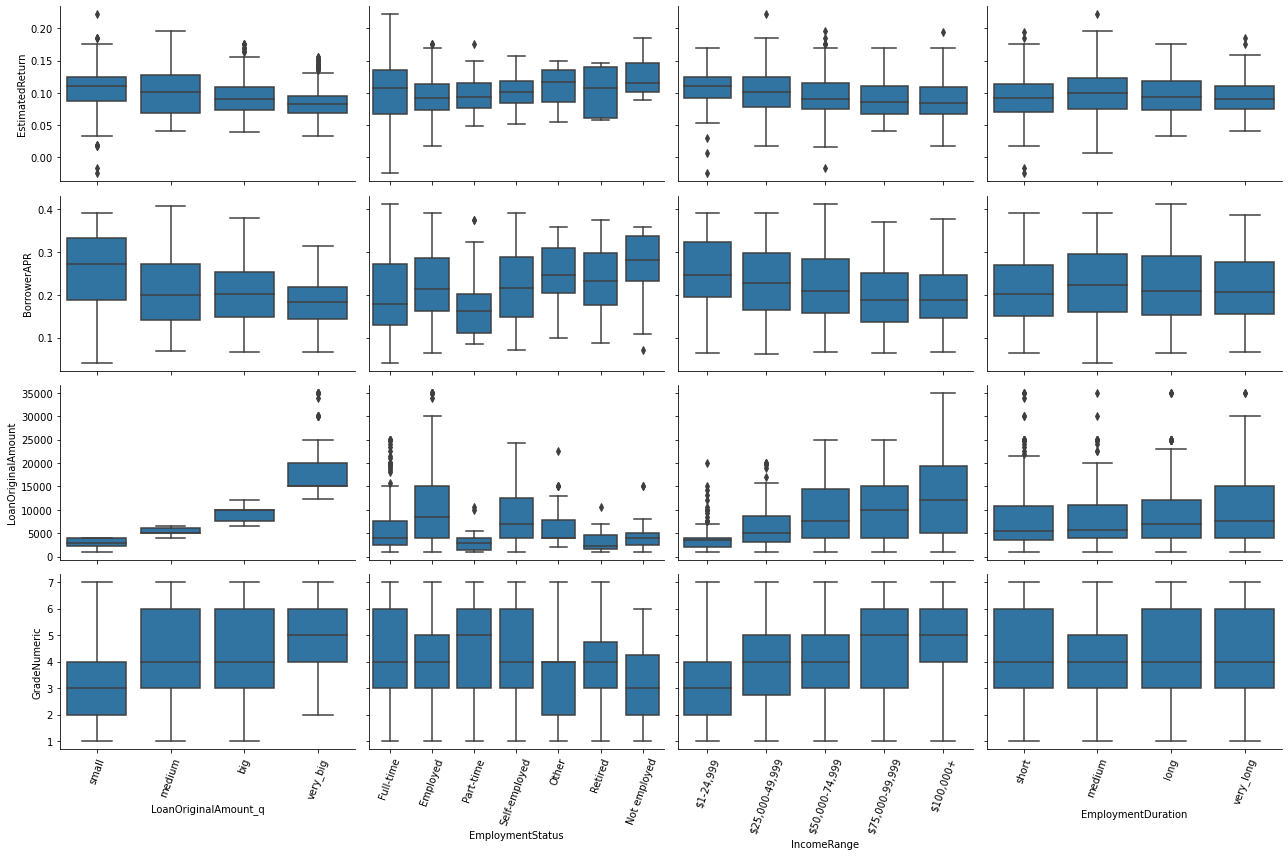

In [41]:
def boxgrid(x,y,**kwargs):
    default_color=sb.color_palette()[0]
    sb.boxplot(x,y,color=default_color)
    
plt.figure(figsize=[10,10]);
g=sb.PairGrid(data=loan_samp, y_vars=['EstimatedReturn','BorrowerAPR','LoanOriginalAmount', 'GradeNumeric'],
             x_vars=categoric_vars, height=3, aspect=1.5)

g.map(boxgrid)

# x labels rotate
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=70);
plt.tight_layout();
plt.show();


> Those box charts show that Grade Numeric is closely linked to income range but, a bit surprisingly, weak link to Employment Status and no link to Employment Duration, that is not expected. I assume that borrowers' grades are decided based on income range at this stage insted of Employment Duratioin and Employment Status. but I need to go further later.
 
> It is also shown that Borrower APR is getting higher, loan amount is getting smaller, and that the mean and std of Borrower APR are dependent on Employment status, but has little impact on the size of Loan Original Amount.

### Correlation to the Loan Status

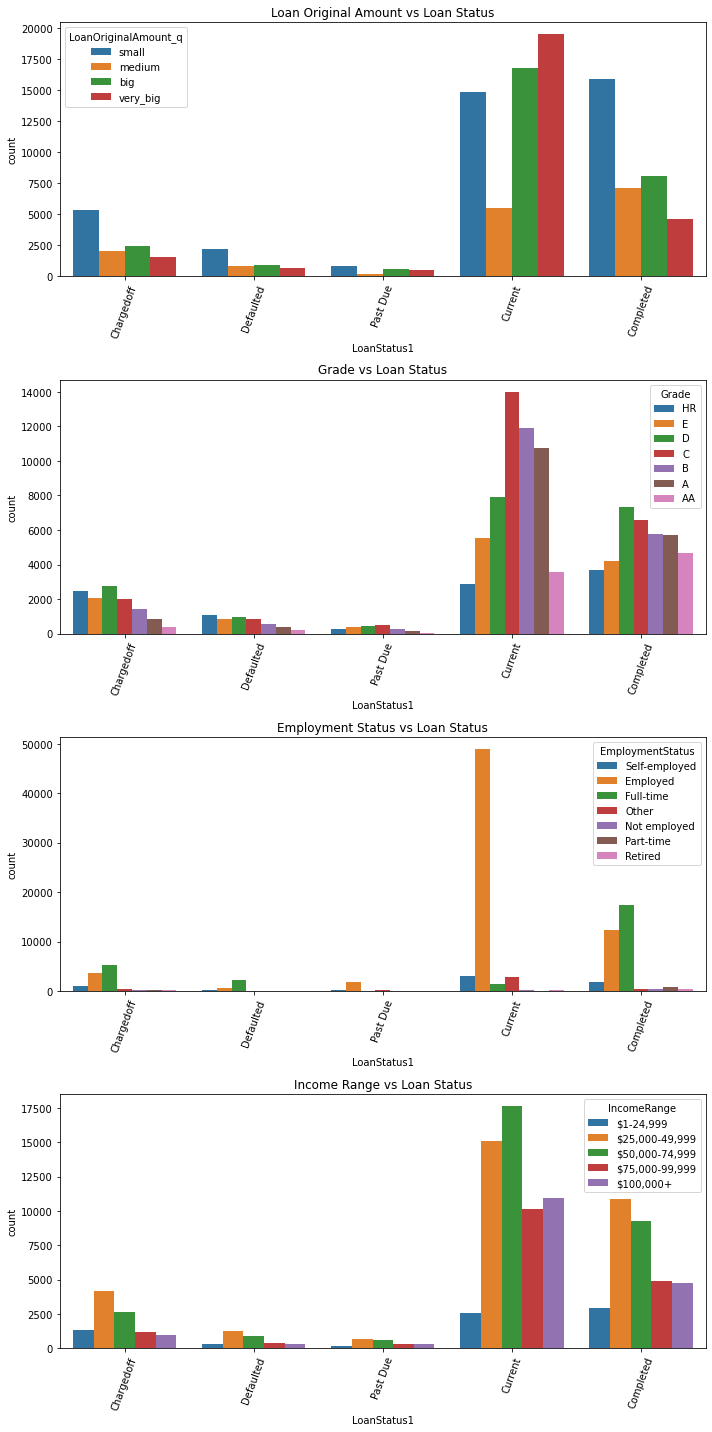

In [42]:
# 4 countplots against LoanStatus
plt.figure(figsize=[10,20])

plt.subplot(4,1,1)
ax=sb.countplot(data=loan, x='LoanStatus1', hue='LoanOriginalAmount_q')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
plt.title('Loan Original Amount vs Loan Status')
plt.tight_layout();

plt.subplot(4,1,2)
ax=sb.countplot(data=loan, x='LoanStatus1', hue='Grade')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
plt.title('Grade vs Loan Status')
plt.tight_layout();

ax=plt.subplot(4,1,3)
sb.countplot(data=loan, x='LoanStatus1', hue='EmploymentStatus')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
plt.title('Employment Status vs Loan Status')
plt.tight_layout();

ax=plt.subplot(4,1,4)
sb.countplot(data=loan, x='LoanStatus1', hue='IncomeRange')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
plt.title('Income Range vs Loan Status')
plt.tight_layout();

>It is shown that small loans and lower grades have higher risks  of charge off, defaulted and past due as expected. Middle to lower income range($25000-$74,999) is the highest cases of  Charged Off, Defaulted and Past due. This is a bit surprising at first look because of the higher risk case than that of the lower income range($1-$24,999), but actually the total numbers of loans in this range are simply bigger than the lowest income range . It can be said that Charged off, defaulted and past due can happen more frequent in the low income range borrowers.

#### Correlation among loan amount, emploment status and grade

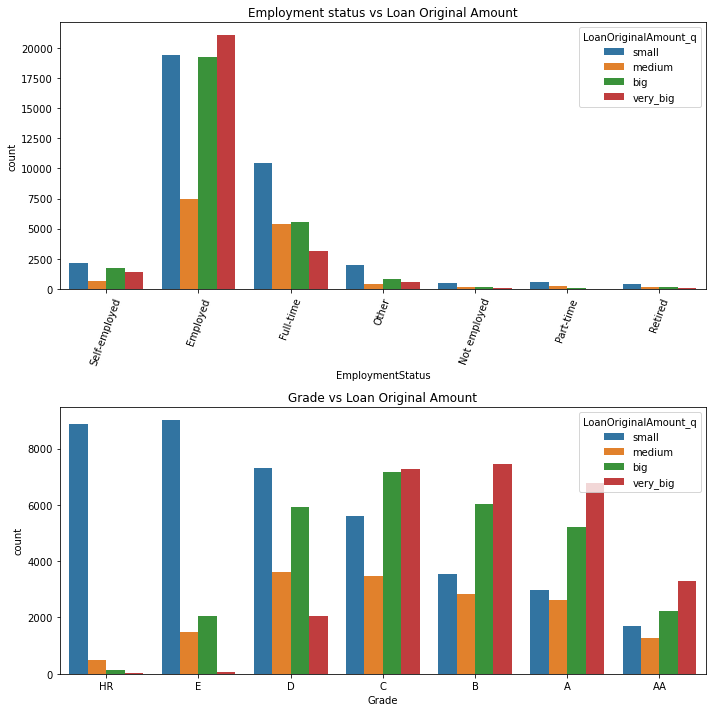

In [43]:
plt.figure(figsize=[10,10])

plt.subplot(2,1,1)
ax=sb.countplot(data=loan, x='EmploymentStatus', hue='LoanOriginalAmount_q');
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
plt.title('Employment status vs Loan Original Amount')
plt.tight_layout();

plt.subplot(2,1,2)
sb.countplot(data=loan, x='Grade', hue='LoanOriginalAmount_q');
plt.title('Grade vs Loan Original Amount');
plt.tight_layout();

> Followings are findings from three plots;
> - Employment Status has a significant impact on Loan Original Amount. ‘Employed’ status  occupied the majority part of loans. ‘Employed’ together with ‘Full time’ covers almost all of the loans. 
> - Loan Original Amount and Grade are positive correlation.  The grade is better, the categories of loan amount are bigger. For grade AA, A, B and C, the most frequent categories are very big loans, while HR, E, D, small loans are the most frequent. Particularly in HR almost all of the loans are small category. 

> Borrowers APR and Estimated Loss are positively correlated and also positively correlated with Estimated Return as well. This outcome is a bit confusing. But it can be understandable that Estimated Return are positive correlations with Borrower APR because high interest rates can give a more profit to lenders than low interest loans but,  at the same time,  that high interest rate is given to low grade borrowers that should increase the chances of defaults. So, this result suggests that a high interest rate loan is a high risk and high return loans.

> Borrower APR is getting higher, loan amount is getting smaller, and that the mean and std of Borrower APR are dependent on Employment status, but has little impact on the size of Loan Original Amount.

> Grade Numeric is positively linked to income range and Employment Status as expected but, a bit surprisingly, very weak link to Employment Duration, that is not expected. I assume that borrowers' grades are categorized mainly based on income range.
 
> In terms of Loan Status small loans and lower grades have higher risks  of charge off, defaulted and past due as expected. Middle to lower income range($25000-$74,999) is the highest cases of  Charged Off, Defaulted and Past due. This is a bit surprising at first look because of the higher risk case than that of the lower income range($1-$24,999), but actually the total numbers of loans in this range are simply bigger than the lowest income range . It can be said that Charged off, defaulted and past due can happen more frequent in the low income range borrowers

>  Employment Status has a significant impact on Loan Original Amount. ‘Employed’ status  occupied the majority part of loans. ‘Employed’ together with ‘Full time’ covers almost all of the loans. 

>  Loan Original Amount and Grade are positive correlation.  The grade is better, the categories of loan amount are bigger. For grade AA, A, B and C, the most frequent categories are very big loans, while HR, E, D, small loans are the most frequent. Particularly in HR almost all of the loans are small category. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Grade and Borrower APR of Retired are better than expected. And Estimated Return of Retired are the best among this categories. 

## Multivariate Exploration

>The main interest I want to explore in this part of the analysis is how the ownership of home may play into the correlation analysed above, particularly Grade, Borrower APR and Loan status.

In [44]:
# differences of loan amount with/without home
pivot_loanamount=loan.pivot_table('LoanOriginalAmount', index='LoanOriginalAmount_q',
                                  columns='IsBorrowerHomeowner', aggfunc='sum')
pivot_loanamount

IsBorrowerHomeowner,False,True
LoanOriginalAmount_q,,
small,69644244,50663131
medium,45093624,39255497
big,125319821,140732262
very_big,154925481,321054287


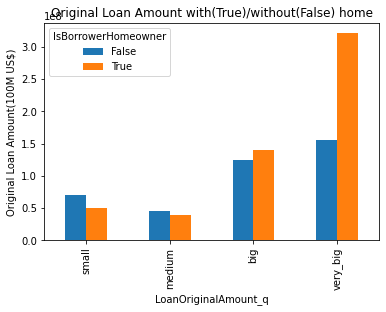

In [45]:
# total loan amounts with/without home in each loan size category
pivot_loanamount.plot(kind='bar');
plt.ylabel('Original Loan Amount(100M US$)');
plt.title('Original Loan Amount with(True)/without(False) home');

In [46]:
# plot fro loan amounts
pivot_loansize=loan.pivot_table('ListingNumber', index='LoanOriginalAmount_q',
                           columns='IsBorrowerHomeowner',aggfunc='size')
pivot_loansize

IsBorrowerHomeowner,False,True
LoanOriginalAmount_q,,
small,23003,16189
medium,8477,7360
big,13681,15112
very_big,9156,17753


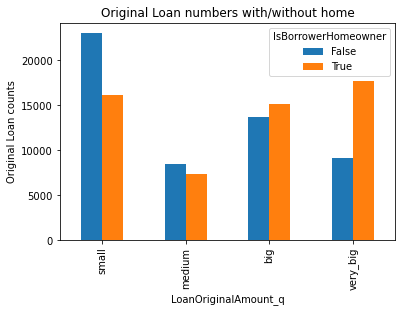

In [47]:
# plot for loan count
pivot_loansize.plot(kind='bar');
plt.ylabel('Original Loan counts');
plt.title('Original Loan numbers with/without home');

> Total amounts of loans for big loan categories by homeowners are about  double compared to no home ownership in very big loans, while in small loans, amounts of loans of no homeowners are bigger than those for homeowners. These findings are the same as the numbers of loans.

#### BorrowerAPR of each loan size with/without home 

In [48]:
# mean of Borrower APR with/without home in each loan size category
pivot_APR=loan.pivot_table('BorrowerAPR', index='LoanOriginalAmount_q',
                           columns='IsBorrowerHomeowner',aggfunc='mean')
pivot_APR

IsBorrowerHomeowner,False,True
LoanOriginalAmount_q,,
small,0.259576,0.256874
medium,0.214372,0.198420
big,0.213083,0.199192
very_big,0.191604,0.176533


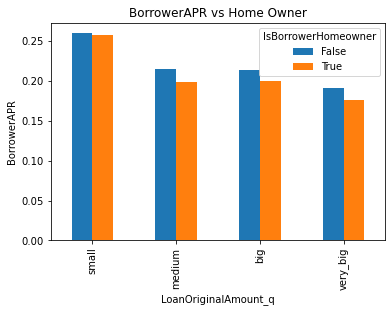

In [49]:
pivot_APR.plot(kind='bar');
plt.ylabel('BorrowerAPR');
plt.title('BorrowerAPR vs Home Owner');

> Home ownership has just a small impact on the level of BorrowerAPR 

In [50]:
# Grade with/without home
pivot_grade=loan.pivot_table('GradeNumeric', index='Grade',
                           columns=['IsBorrowerHomeowner'],aggfunc='count')
pivot_grade

IsBorrowerHomeowner,False,True
Grade,,
HR,6369,4074
E,8055,5029
D,11470,7957
C,11888,12106
B,8966,11004
A,7097,10769
AA,2408,6473


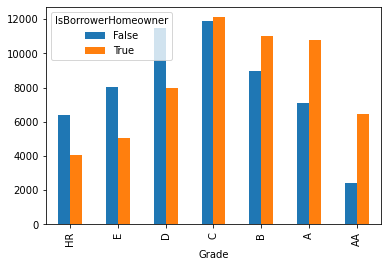

In [51]:
pivot_grade.plot(kind='bar');


> Grades are evidently correlated with home ownership.

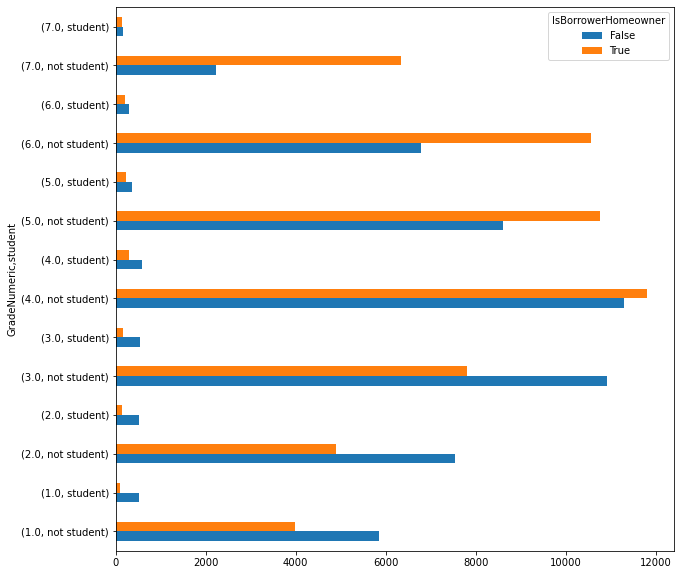

In [52]:
student_grade=loan.groupby(['GradeNumeric','student','IsBorrowerHomeowner'])
student_grade.size().unstack().plot(kind='barh', figsize=[10,10]);

> Those students in higher grade are the different trend with others. Grade 4, 5 and 6, numbers of students without homes are more popular than homeowner students. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Total amounts of loans for big loan categories by homeowners are about  double compared to no home ownership in very big loans, while in small loans, amounts of loans of no homeowners are bigger than those for homeowners. These findings are the same as the numbers of loans.
> Home ownership has just a small impact, or differences on the level of BorrowerAPR. Particularly in small loan, mean of Borrower APR are almost same between homeowners and non homeowners. 

> Grades are evidently correlated with home ownership. AA Grade, numbers of homeowners are almost triple compared to non homeowners. 

> Now I can say that Income range and Homeownership are key factors of Grades, and Grades together with Employment status impact on Borrower APR on Loan Amounts.

### Were there any interesting or surprising interactions between features?

> No, from the analysis above, findings are generally in line with my expectation except students. How can students get high grades even without home and get loans ? This question is still wandering in my mind, but I think that it is not possible to look into this question from this dataset.